# Energy and time resolution at T=298 K and T=104 K

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit

from crysp import crysp

In [2]:
mpl.rcParams.update({
    "font.family": "serif",
    "axes.titlesize": "xx-large",
    "axes.labelsize": "xx-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
    "legend.fontsize": "large",
    "figure.titlesize": "xx-large",
    "legend.frameon": False,
    "text.usetex": True
})

## T = 298 K

In [3]:
time_warm, left_warm, right_warm = crysp.read_file("../na22_lightoff.zip")

In [4]:
baselines_left = np.average(left_warm[:, :2000], axis=1)[:, None]
baselines_right = np.average(right_warm[:, :2000], axis=1)[:, None]
integral_left = np.trapz(
    (left_warm-baselines_left)[:, time_warm > -0.8e-7], x=time_warm[time_warm > -0.8e-7]
)
integral_right = np.trapz(
    (right_warm-baselines_right)[:, time_warm > -0.8e-7], x=time_warm[time_warm > -0.8e-7]
)

### Energy resolution

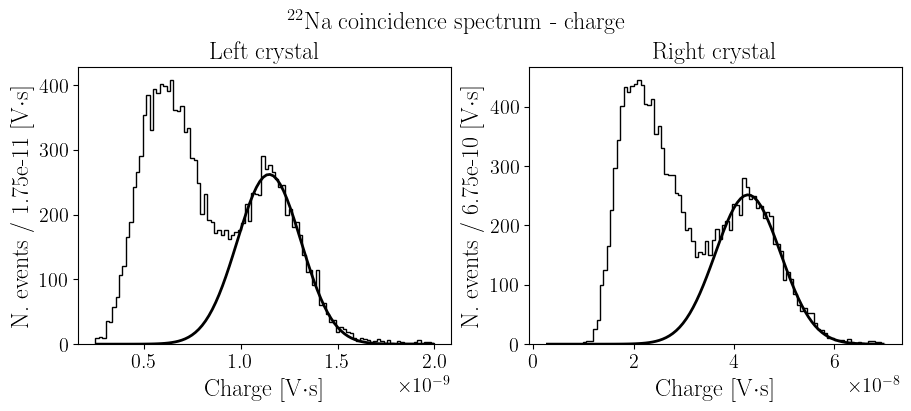

In [5]:
fig, ax, popt_left, pcov_left, popt_right, pcov_right = crysp.charge_spectra(
    integral_left, integral_right, (0.25e-9, 2e-9), (0.25e-8, 0.7e-7), 1e-9, 4e-8
)

Text(0.5, 0.98, '$^{22}$Na coincidence spectrum at T=298 K')

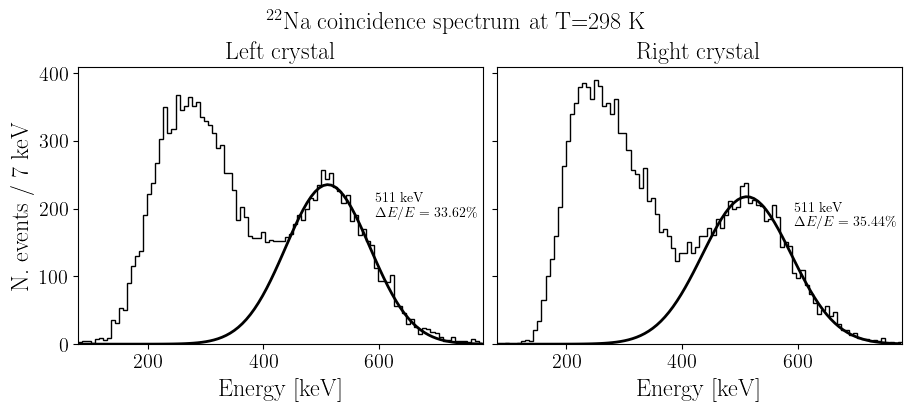

In [6]:
left_energy = integral_left / popt_left[1] * 511
right_energy = integral_right / popt_right[1] * 511

(
    fig,
    ax,
    popt_left_energy,
    pcov_left_energy,
    popt_right_energy,
    pcov_right_energy,
) = crysp.energy_spectra(
    left_energy, right_energy, x_range=(80, 780), fit_position=450, text_left=False
)

fig.suptitle(r"$^{22}$Na coincidence spectrum at T=298 K")

### Time resolution

In [7]:
left_times, right_times = crysp.time_resolution(
    time_warm,
    left_warm - baselines_left,
    right_warm - baselines_right,
    left_energy,
    right_energy,
    np.std(baselines_left) * 12,
    np.std(baselines_right) * 12,
    popt_left_energy[2],
    popt_right_energy[2],
    (-2e-7, 0.2e-7),
)

100%|██████████| 1494/1494 [00:00<00:00, 23153.00it/s]


Text(0.5, 1.0, 'Time resolution at T=298 K')

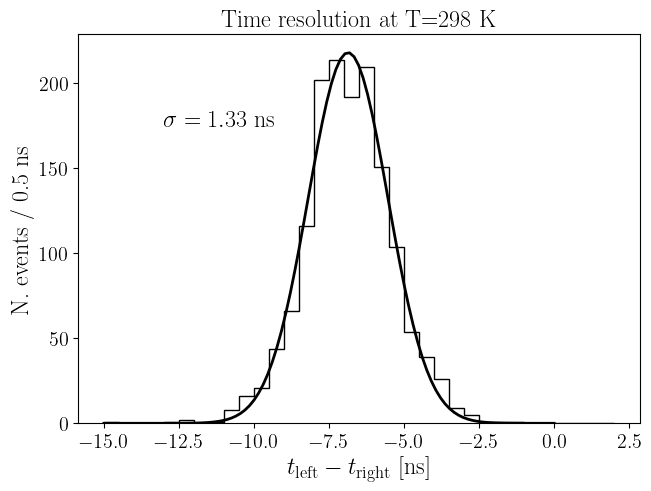

In [8]:
time_diff = left_times-right_times
fig, ax = plt.subplots(1,1,constrained_layout=True)
n, bins, patches = ax.hist(time_diff*1e9,
                           bins=np.linspace(-15,2,35),
                           histtype='step',
                           color='k')
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_time, pcov_time = curve_fit(
    crysp.gauss,
    bin_centers,
    n,
    p0=(150, -9, 0.5),
)
xx = np.linspace(-15, 0, 100)
ax.plot(xx, crysp.gauss(xx, *popt_time),c='k')
ax.text(popt_time[1]*1.9, popt_time[0]*0.8, rf"$\sigma={popt_time[2]:.2f}$ ns", fontsize='xx-large')
ax.set_xlabel(r"$t_{\mathrm{left}}-t_{\mathrm{right}}$ [ns]")
ax.set_ylabel(f"N. events / {bins[1]-bins[0]:.2g} ns")
ax.set_title("Time resolution at T=298 K")

## T=104 K

In [9]:
time_cold, right_cold, left_cold = crysp.read_file("../na22_20230725_afternoon.zip")
left_cold = -left_cold
right_cold = -right_cold

In [10]:
baselines_left_cold = np.average(left_cold[:, :500], axis=1)[:, None]
baselines_right_cold = np.average(right_cold[:, :500], axis=1)[:, None]
integral_left_cold = np.trapz(
    (left_cold-baselines_left_cold)[:, time_cold > -0.5e-6], x=time_cold[time_cold > -0.5e-6]
)
integral_right_cold = np.trapz(
    (right_cold-baselines_right_cold)[:, time_cold > -0.5e-6], x=time_cold[time_cold > -0.5e-6]
)

### Energy resolution

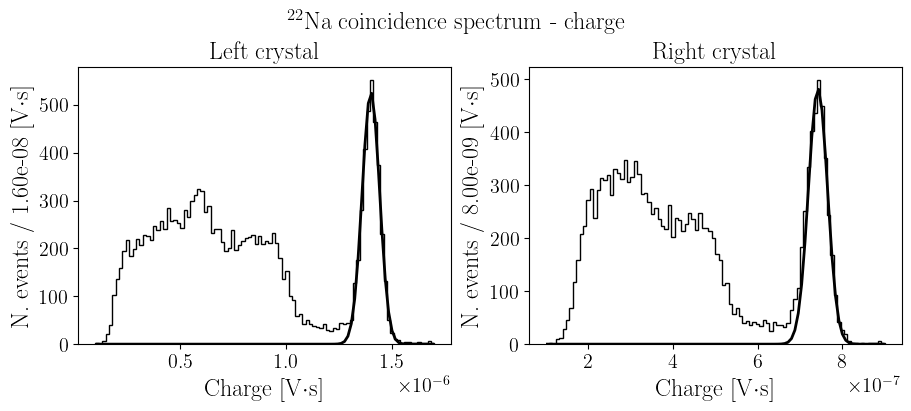

In [11]:
fig, ax, popt_left_cold, pcov_left_cold, popt_right_cold, pcov_right_cold = crysp.charge_spectra(
    integral_left_cold, integral_right_cold, (0.1e-6,1.7e-6), (0.1e-6, 0.9e-6), 1.26e-6, 7.2e-7
)

Text(0.5, 0.98, '$^{22}$Na coincidence spectrum at T=104 K')

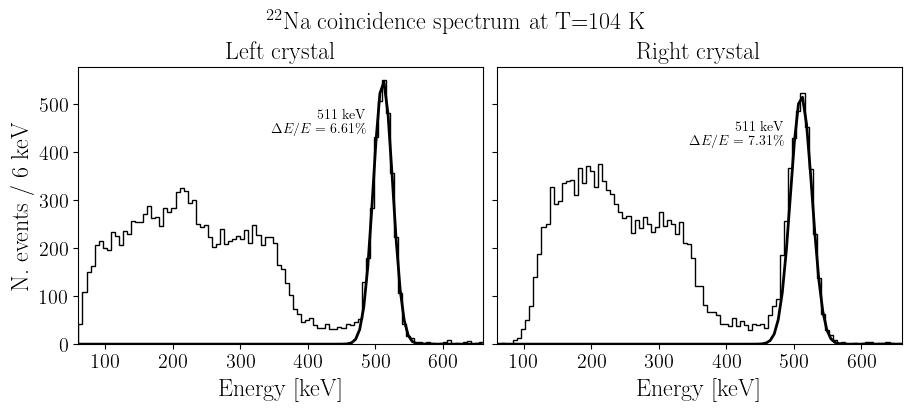

In [12]:
left_energy_cold = integral_left_cold / popt_left_cold[1] * 511
right_energy_cold = integral_right_cold / popt_right_cold[1] * 511

(
    fig,
    ax,
    popt_left_energy_cold,
    pcov_left_energy_cold,
    popt_right_energy_cold,
    pcov_right_energy_cold,
) = crysp.energy_spectra(
    left_energy_cold, right_energy_cold, x_range=(60, 660), fit_position=500, text_left=True
)

fig.suptitle(r"$^{22}$Na coincidence spectrum at T=104 K")

### Time resolution

In [13]:
left_times_cold, right_times_cold = crysp.time_resolution(
    time_cold,
    left_cold - baselines_left_cold,
    right_cold - baselines_right_cold,
    left_energy_cold,
    right_energy_cold,
    np.std(baselines_left_cold) * 2,
    np.std(baselines_right_cold) * 2,
    popt_left_energy_cold[2],
    popt_right_energy_cold[2],
    (-0.5e-6, 0.3e-6),
)

100%|██████████| 426/426 [00:00<00:00, 13449.05it/s]


Text(0.5, 1.0, 'Time resolution at T=104 K')

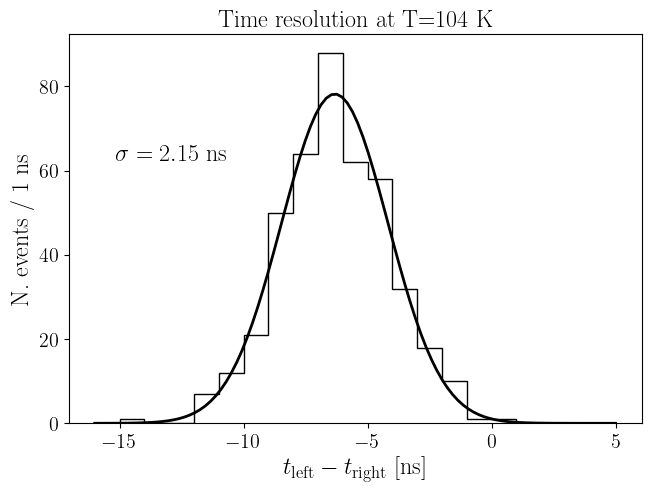

In [14]:
time_diff_cold = left_times_cold-right_times_cold
fig, ax = plt.subplots(1,1,constrained_layout=True)
n, bins, patches = ax.hist(time_diff_cold*1e9,
                           bins=np.linspace(-16,5,22),
                           histtype='step',
                           color='k')
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_time, pcov_time = curve_fit(
    crysp.gauss,
    bin_centers,
    n,
    p0=(150, -5, 0.5),
)
xx = np.linspace(-16, 5, 100)
ax.plot(xx, crysp.gauss(xx, *popt_time),c='k')
ax.text(popt_time[1]*2.4, popt_time[0]*0.8, rf"$\sigma={popt_time[2]:.2f}$ ns", fontsize='xx-large')
ax.set_xlabel(r"$t_{\mathrm{left}}-t_{\mathrm{right}}$ [ns]")
ax.set_ylabel(f"N. events / {bins[1]-bins[0]:.2g} ns")
# ax.set_xlim(-14,-1)
ax.set_title("Time resolution at T=104 K")

## Single crystal spectrum

In [32]:
time_single, single_crystal = crysp.read_single_crystal("../voltage_study/na22_20230726_597v.zip", ticks_column=1)

In [270]:
baselines_single = np.average(single_crystal[:, :500], axis=1)[:, None]
integral_single = -np.trapz(
    (single_crystal)[:, time_single > -0.5e-3], x=time_single[time_single > -0.5e-3]
)

Text(0, 0.5, 'N. events / 1.3e-08 keV')

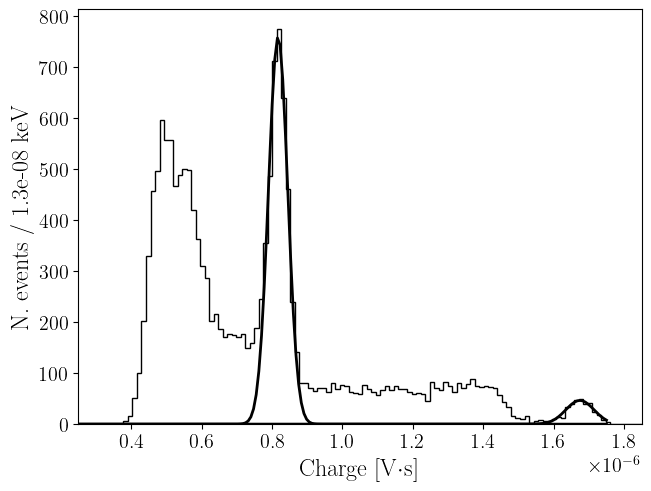

In [272]:
fig, ax = plt.subplots(1, 1,constrained_layout=True)
n_single, bins, patches = ax.hist(
    integral_single, bins=125, range=(0.25e-6, 1.85e-6), histtype="step", color="k"
)
bin_centers = (bins[:-1] + bins[1:]) / 2

popt_single, pcov_single = curve_fit(
    crysp.gauss,
    bin_centers[(bin_centers>0.77e-6)&(bin_centers<0.86e-6)],
    n_single[(bin_centers>0.77e-6)&(bin_centers<0.86e-6)],
    p0=(600,  0.75e-6, 0.1e-6),
)
xx = np.linspace(0.25e-6, 1.75e-6, 200)
ax.plot(xx, crysp.gauss(xx, *popt_single),c='k')

popt_gamma, pcov_gamma = curve_fit(
    crysp.gauss,
    bin_centers[(bin_centers>1.5e-6)&(bin_centers<1.7e-6)],
    n_single[(bin_centers>1.5e-6)&(bin_centers<1.7e-6)],
    p0=(600,  1.6e-6, 0.1e-6),
)
ax.plot(xx, crysp.gauss(xx, *popt_gamma),c='k')
ax.set_xlim(0.25e-6, 1.85e-6)
ax.set_xlabel(r"Charge [V$\cdot$s]")
ax.set_ylabel(f"N. events / {bins[1]-bins[0]:.2g} keV")

In [273]:
m = (popt_gamma[1]-popt_single[1])/(1275-511)
q = (1275*popt_single[1]-511*popt_gamma[1])/(1275-511)

Text(0.5, 1.0, '$^{22}$Na spectrum')

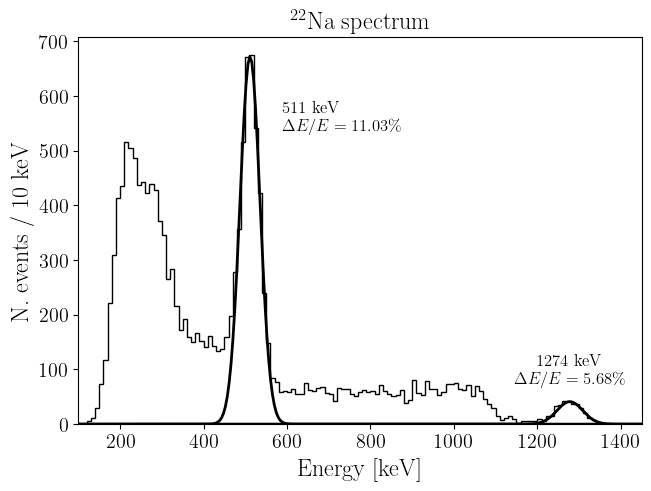

In [274]:
single_energy = (integral_single - q) / m
fig, ax  = plt.subplots(1,1,constrained_layout=True)
n_single, bins, patches = ax.hist(
    single_energy, bins=135, range=(100,1450), histtype="step", color="k"
)
bin_centers = (bins[:-1] + bins[1:]) / 2

popt_single_energy, pcov_single_energy = curve_fit(
    crysp.gauss,
    bin_centers[(bin_centers>490)&(bin_centers<560)],
    n_single[(bin_centers>490)&(bin_centers<560)],
    p0=(600, 511, 50),
)
xx = np.linspace(100, 1450, 300)
ax.plot(xx, crysp.gauss(xx, *popt_single_energy),c='k')
ax.set_xlim(100,1450)

popt_gamma_energy, pcov_gamma_energy = curve_fit(
    crysp.gauss,
    bin_centers[(bin_centers>1270)&(bin_centers<1400)],
    n_single[(bin_centers>1270)&(bin_centers<1400)],
    p0=(600, 1275, 50),
)
ax.plot(xx, crysp.gauss(xx, *popt_gamma_energy),c='k')
ax.text(
    popt_single_energy[1] * 1.15,
    popt_single_energy[0] * 0.8,
    f"511 keV\n$\Delta E/E={2.355*popt_single_energy[2]/popt_single_energy[1]*100:.2f}$\%%",
    horizontalalignment="left",
    fontsize='large'
)

ax.text(
    popt_gamma_energy[1],
    popt_gamma_energy[0] * 1.8,
    f"1274 keV\n$\Delta E/E={2.355*popt_gamma_energy[2]/popt_gamma_energy[1]*100:.2f}$\%%",
    horizontalalignment="center",
    fontsize='large'
)
ax.set_xlabel("Energy [keV]")
ax.set_ylabel(f"N. events / {bins[1]-bins[0]:.2g} keV")
ax.set_title("$^{22}$Na spectrum")
# ax.axvline(550)
# ax.axvline(490)